In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import tweepy
#from textblob import TextBlob
#from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
#import snscrape.modules.twitter as sntwitter
#import string

from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
import random
from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix,f1_score,precision_recall_curve,roc_curve,precision_score,recall_score,accuracy_score,classification_report
#import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
#from google.colab import drive
import seaborn as sn



plt.style.use('fivethirtyeight')

In [3]:
#importing dataset on 19 june 2022
#drive.mount('/content/drive')
#train = pd.read_csv('/content/drive/My Drive/SentimentAnalysis/training_dataset.csv')
#test = pd.read_csv('/content/drive/My Drive/SentimentAnalysis/testing_dataset.csv')
dataset=pd.read_csv('dataset.csv')

#print(train.shape)
#print(test.shape)
print(dataset.shape)

(11250, 8)


In [4]:
# Renaming 1st column to "tweet_num"
#train=train.rename(columns={test.columns[0]: 'Tweet_num'})
#test=test.rename(columns={test.columns[0]: 'Tweet_num'})
dataset=dataset.rename(columns={dataset.columns[0]: 'Tweet_num'})

In [5]:
dataset

,Tweet_num,Date,User,Tweet,Subjectivity,Polarity,Analysis,Label
0,0,2022-06-19 14:39:17+00:00,SuganthanRamak1,for gods sake its their choice putin on ukrain...,0.000000,0.000000,Neutral,2
1,1,2022-06-19 14:38:45+00:00,WilsonShilo,the eu warn that russian action in russiaukrai...,0.050000,0.050000,Positive,1
2,3,2022-06-19 14:37:19+00:00,NasticInc,a russian plane crash near chernihiv ukraine r...,0.133333,0.033333,Positive,1
3,6,2022-06-19 14:35:51+00:00,NasticInc,terror attack catch on cctv footage standwithu...,0.000000,0.000000,Neutral,2
4,7,2022-06-19 14:35:23+00:00,NasticInc,a russian ship burn at port of berdyansk ukrai...,0.000000,0.000000,Neutral,2
...,...,...,...,...,...,...,...,...
11245,24994,2022-05-27 00:11:50+00:00,ichbin_ironhill,russia doesnt kill the 5000 ukrainian pows ukr...,0.333333,0.200000,Positive,1
11246,24995,2022-05-27 00:04:53+00:00,RusskieUkraine,insane footage from ukraine us and uk foreign ...,0.545000,-0.265000,Negative,0
11247,24996,2022-05-27 00:03:51+00:00,Globallpolitics,obesity be the second lead cause of death in t...,0.000000,0.000000,Neutral,2
11248,24997,2022-05-27 00:01:02+00:00,Globallpolitics,list of 6 anti agingfood usa china food antiag...,0.000000,0.000000,Neutral,2


In [6]:
#train.head()

In [7]:
#test.head()

In [8]:
#train.isnull().any()
#test.isnull().any()

In [9]:
# checking out the negative comments from the train set

#train[train['Label'] == 0].head(10)

In [10]:
# checking out the postive comments from the train set 

#train[train['Label'] == 1].head(10)

In [11]:
#train['Label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

In [12]:

# checking the distribution of tweets in the data

#length_train = train['Tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
#length_test = test['Tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [13]:
# adding a column to represent the length of the tweet

#train['Len'] = train['Tweet'].str.len()
#test['Len'] = test['Tweet'].str.len()

#train.head(10)

In [14]:

#train.groupby('Label').describe()


In [15]:


#train.groupby('Len').mean()['Label'].plot.hist(color = 'black', figsize = (6, 4),)
#plt.title('variation of length')
#plt.xlabel('Length')
#plt.show()



# 5. Data Modelling

Feature Extraction

In [16]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
dataset_corpus = []

for i in range(0, 11250):
  review = re.sub('[^a-zA-Z]', ' ', dataset['Tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  dataset_corpus.append(review)



In [18]:
len(dataset_corpus)

11250

In [19]:
#deletable


In [20]:
dataset

,Tweet_num,Date,User,Tweet,Subjectivity,Polarity,Analysis,Label
0,0,2022-06-19 14:39:17+00:00,SuganthanRamak1,for gods sake its their choice putin on ukrain...,0.000000,0.000000,Neutral,2
1,1,2022-06-19 14:38:45+00:00,WilsonShilo,the eu warn that russian action in russiaukrai...,0.050000,0.050000,Positive,1
2,3,2022-06-19 14:37:19+00:00,NasticInc,a russian plane crash near chernihiv ukraine r...,0.133333,0.033333,Positive,1
3,6,2022-06-19 14:35:51+00:00,NasticInc,terror attack catch on cctv footage standwithu...,0.000000,0.000000,Neutral,2
4,7,2022-06-19 14:35:23+00:00,NasticInc,a russian ship burn at port of berdyansk ukrai...,0.000000,0.000000,Neutral,2
...,...,...,...,...,...,...,...,...
11245,24994,2022-05-27 00:11:50+00:00,ichbin_ironhill,russia doesnt kill the 5000 ukrainian pows ukr...,0.333333,0.200000,Positive,1
11246,24995,2022-05-27 00:04:53+00:00,RusskieUkraine,insane footage from ukraine us and uk foreign ...,0.545000,-0.265000,Negative,0
11247,24996,2022-05-27 00:03:51+00:00,Globallpolitics,obesity be the second lead cause of death in t...,0.000000,0.000000,Neutral,2
11248,24997,2022-05-27 00:01:02+00:00,Globallpolitics,list of 6 anti agingfood usa china food antiag...,0.000000,0.000000,Neutral,2


In [21]:
Y = dataset.iloc[:, 7]
print(Y.shape)

(11250,)


**5.1 MODEL-1 : Bag of Words Model**

It is a simplifying representation used in natural language procesing and information retrieval. This model is commonly used in methods of document classification where the (frequency of) occurence of each word is used as a feature for training a classifier.

In [22]:
#dcorp=dataset['Tweet'].toarray()

In [23]:
cv = CountVectorizer()
#ngram_range=(1,1), analyzer='word',min_df=10
X1 = cv.fit_transform(dataset_corpus)

print('Shape of Data Matrix for Bag of words model: ', X1.shape)
print(list(random.sample(list(cv.get_feature_names_out()),10)))

Shape of Data Matrix for Bag of words model:  (11250, 18879)
['honey', 'censor', 'alli', 'russianoccupi', 'velyka', 'sauron', 'tag', 'rectum', 'onlin', 'bullet']


In [24]:
#print(X1.toarray())

**5.2 MODEL-2 : N-gram Model**

It can be defined as the contiguous sequence of 'n' items from a given sample of text. this model will predict the probability of a given n-gram within any sequesce of words in the language

In [25]:
cv = CountVectorizer(ngram_range=(2,2), analyzer='word', min_df=10)
X2 = cv.fit_transform(dataset_corpus)
print('Shape of Data Matrix for N-gram model(n=2): ', X2.shape)
print(random.sample(list(cv.get_feature_names_out()), 10))

Shape of Data Matrix for N-gram model(n=2):  (11250, 1070)
['ukrainerussiawar russiaukrainewar', 'stopputin stoprussia', 'russiaukrainewar media', 'armi russiaukrainewar', 'stoprussia ukrain', 'mass grave', 'russiaukrainewar ukrainerussiawar', 'amp close', 'cruis missil', 'innoc peopl']


In [26]:
print(X2.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**5.3 MODEL-3 : TF-IDF Model**

*Term frequency-inverse document frequency*

unlike ,bag of words, tf-idf creates a normal count where each word count is divided by the number of document this word appears in

In [184]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df=10)
#analyzer='word', ngram_range=(1,1), min_df=10
X3 = tfidf.fit_transform(dataset_corpus)
print('Shape of Data Matrix for TF-IDF model: ', X3.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF model:  (11250, 2198)
['winter', 'youtub', 'cultur', 'imperialist', 'van', 'germani', 'surpris', 'grant', 'sponsor', 'genocideofukrainian']


**5.4 MODEL-4 : TF-IDF N-gram Model**

In [28]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2,2), min_df=10)
X4 = tfidf.fit_transform(dataset_corpus)
print('Shape of Data Matrix for TF-IDF N-gram model(n=2): ', X4.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF N-gram model(n=2):  (11250, 1070)
['russia ukrainerussiawar', 'ukrain lose', 'russiaukrainewar russiaukrain', 'russiaukrainewar warinukrain', 'month ago', 'catch cctv', 'donbass russia', 'russiaukrainewar kharkiv', 'break ukrainian', 'russiaukrainewar impact']


**5.5 MODEL-5 : TF-IDF with mixture of N-Gram**

In [29]:
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,3), min_df=20)
X5 = tfidf.fit_transform(dataset_corpus)
print('Shape of Data Matrix for TF-IDF and mixture of N-gram model(n=1,2,3): ', X5.shape)
print(random.sample(list(tfidf.get_feature_names_out()), 10))

Shape of Data Matrix for TF-IDF and mixture of N-gram model(n=1,2,3):  (11250, 1963)
['armukrainenow russiaukrainewar', 'russiaukrainewar ukrainian', 'russia say', 'ukraineunderattak russiainvadedukrain', 'ukrainerussiawar ukrainerussia', 'ruso', 'era', 'ukrainewillwin ukraina', 'ukrainian troop', 'provok']


## **Splitting the data into train and testing sets**

In [30]:
print(X1.shape)
print(Y.shape)

(11250, 18879)
(11250,)


In [185]:
#from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X3,Y, test_size = 0.3, random_state = 42)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7875, 2198)
(3375, 2198)
(7875,)
(3375,)


In [186]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=False)

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


# **Machine Learning Model**

**Model-1 : Random Forest**

In [188]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_test, y_pred,pos_label='positive',average='macro'))

#Calculating Precision and Recall Score
print('Accuracy: ', accuracy_score(y_test, y_pred))
PS=precision_score(y_test, y_pred,average='macro')
RS=recall_score(y_test, y_pred,average='macro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



Training Accuracy : 0.9991111111111111
Validation Accuracy : 0.7733333333333333
F1 score : 0.7431507247507906
Accuracy:  0.7733333333333333
Precision Score:  0.7848858403729894
Recall Score:  0.7257752848855031
[[ 382  130  187]
 [  72  796  257]
 [  11  108 1432]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [189]:
Model_Accuracy=[]
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333]


In [190]:
y_pred

array([2, 2, 0, ..., 1, 1, 2], dtype=int64)

In [191]:
confusion_M1=pd.crosstab(y_test,y_pred)
confusion_M1

col_0,0,1,2
Label,,,
0,382,130,187
1,72,796,257
2,11,108,1432


In [192]:
#sum of diagonoals
#np.diag(confusion_M1).sum()

#accuracy
np.diag(confusion_M1).sum()/confusion_M1.sum().sum()

0.7733333333333333

**Scores for class 0**

In [193]:
TP=confusion_M1.iloc[0,0].sum()
TP

382

In [194]:
FP=confusion_M1.iloc[0,:].sum()-TP
FP

317

In [195]:
FN=confusion_M1.iloc[:,0].sum()-TP
FN

83

In [196]:
TN=confusion_M1.sum().sum()-TP-FP-FN
TN

2593

In [197]:
#Find out accuracy of Every Single class
#Accuracy for class 0
Accuracy_class0=(TP+TN)/confusion_M1.sum().sum()
Accuracy_class0

0.8814814814814815

In [198]:
precision_class0=TP/(TP+FP)
precision_class0

0.5464949928469242

In [199]:
Recall_class0=TP/(TP+FN)
Recall_class0

0.821505376344086

In [200]:
F1_Class0=(2*precision_class0*Recall_class0)/(precision_class0+Recall_class0)
F1_Class0

0.6563573883161513

**Scores for class 1**

In [201]:
TP=confusion_M1.iloc[1,1].sum()
FP=confusion_M1.iloc[0,:].sum()-TP
FN=confusion_M1.iloc[:,0].sum()-TP
TN=confusion_M1.sum().sum()-TP-FP-FN

In [202]:
#Find out accuracy of Every Single class
#Accuracy for class 1
Accuracy_class1=(TP+TN)/confusion_M1.sum().sum()
precision_class1=TP/(TP+FP)
Recall_class1=TP/(TP+FN)
F1_Class1=(2*precision_class0*Recall_class0)/(precision_class0+Recall_class0)

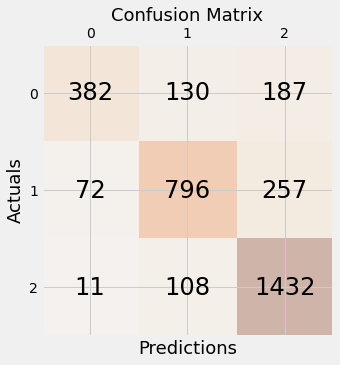

In [203]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [204]:
for i in range(confusion_M1.shape[0]):
    TP=confusion_M1.iloc[i,i].sum()
    FP=confusion_M1.iloc[i,:].sum()-TP
    FN=confusion_M1.iloc[:,i].sum()-TP
    TN=confusion_M1.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M1.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M1.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)

0 0.8814814814814815 0.5464949928469242 0.821505376344086 0.6563573883161513
1 0.832 0.7075555555555556 0.769825918762089 0.7373784159333024
2 0.8331851851851851 0.9232753062540296 0.7633262260127932 0.8357163700029181


In [206]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2812 WP :  563


In [207]:
RF_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
RF_Report.to_excel('TF-IDF_RF.xlsx')
RF_Report

,precision,recall,f1-score,support
0,0.821505,0.546495,0.656357,699.000000
1,0.769826,0.707556,0.737378,1125.000000
2,0.763326,0.923275,0.835716,1551.000000
accuracy,0.773333,0.773333,0.773333,0.773333
macro avg,0.784886,0.725775,0.743151,3375.000000
weighted avg,0.777542,0.773333,0.765790,3375.000000


**ROC Curve- Receiver Operating Characteristics Curve**

FPR (x-axis) TPR (y-axis)

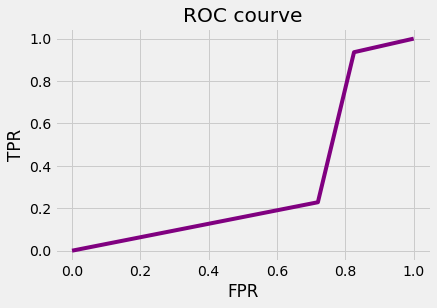

In [208]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()

**PRC Curve**

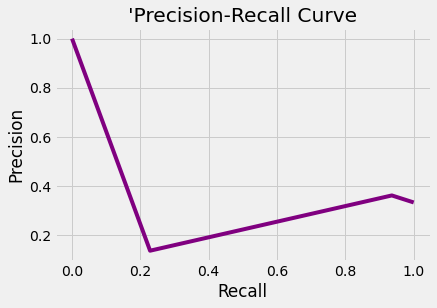

In [209]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("'Precision-Recall Curve")
plt.show()



# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
plt.show()

**Model-2 : Logistic Regression**

In [213]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm) 

Training Accuracy : 0.9987301587301587
Validation Accuracy : 0.7075555555555556
f1 score : 0.7075555555555555
Precision Score:  0.7075555555555556
Recall Score:  0.7075555555555556
[[ 448  133  118]
 [ 174  775  176]
 [ 161  225 1165]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556]


**Confusion Matrix**

Text(0.5, 1.0, 'Confusion Matrix')

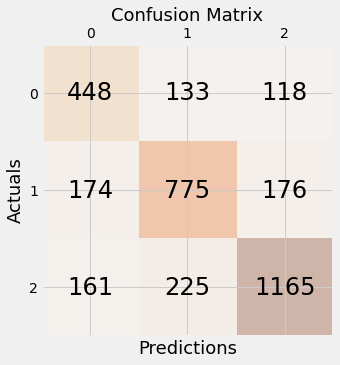

In [215]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [216]:
confusion_M2=pd.crosstab(y_test,y_pred)
confusion_M2

col_0,0,1,2
Label,,,
0,448,133,118
1,174,775,176
2,161,225,1165


**Scores for class 0,1,2 simulaneously**

In [217]:
for i in range(confusion_M2.shape[0]):
    TP=confusion_M2.iloc[i,i].sum()
    FP=confusion_M2.iloc[i,:].sum()-TP
    FN=confusion_M2.iloc[:,i].sum()-TP
    TN=confusion_M2.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M2.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M2.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)

0 0.8263703703703704 0.6409155937052933 0.5721583652618135 0.6045883940620783
1 0.7902222222222223 0.6888888888888889 0.6840247131509267 0.6864481842338352
2 0.7985185185185185 0.7511283043197937 0.798492117888965 0.7740863787375416


In [219]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2695 WP :  680


In [218]:
LR_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
LR_Report.to_excel('TF-IDF_LR.xlsx')
LR_Report

,precision,recall,f1-score,support
0,0.572158,0.640916,0.604588,699.000000
1,0.684025,0.688889,0.686448,1125.000000
2,0.798492,0.751128,0.774086,1551.000000
accuracy,0.707556,0.707556,0.707556,0.707556
macro avg,0.684892,0.693644,0.688374,3375.000000
weighted avg,0.713460,0.707556,0.709769,3375.000000


**ROC Curve- Receiver Operating Characteristics Curve**

FPR (x-axis) TPR (y-axis)

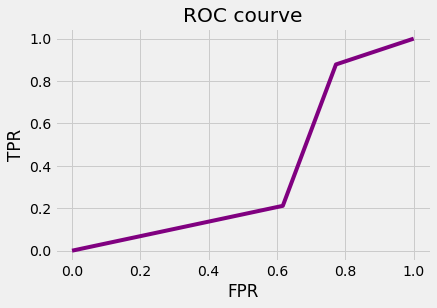

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()

**PRC Curve**

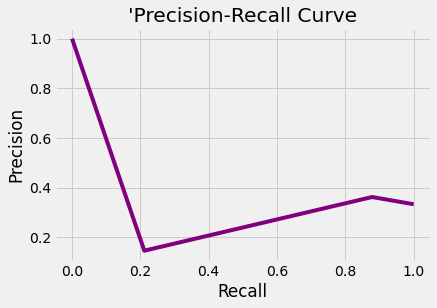

In [60]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("'Precision-Recall Curve")
plt.show()



# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
plt.show()

**Model-3 : Decision Tree**

In [220]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9991111111111111
Validation Accuracy : 0.7102222222222222
f1 score : 0.7102222222222222
Precision Score:  0.7102222222222222
Recall Score:  0.7102222222222222
[[ 396  160  143]
 [ 152  737  236]
 [  99  188 1264]]


In [223]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556, 0.7102222222222222, 0.7102222222222222]


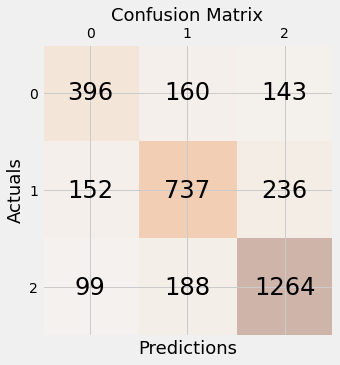

In [224]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [225]:
confusion_M3=pd.crosstab(y_test,y_pred)
confusion_M3

col_0,0,1,2
Label,,,
0,396,160,143
1,152,737,236
2,99,188,1264


**Scores for class 0,1,2 simulaneously**

In [226]:
for i in range(confusion_M3.shape[0]):
    TP=confusion_M3.iloc[i,i].sum()
    FP=confusion_M3.iloc[i,:].sum()-TP
    FN=confusion_M3.iloc[:,i].sum()-TP
    TN=confusion_M3.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M3.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M3.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)




0 0.8358518518518518 0.5665236051502146 0.6120556414219475 0.5884101040118871
1 0.7819259259259259 0.6551111111111111 0.6792626728110599 0.6669683257918552
2 0.8026666666666666 0.8149580915538363 0.7693244065733414 0.7914840325610519


In [228]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2709 WP :  666


In [229]:
DT_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
DT_Report.to_excel('TF-IDF_DT.xlsx')
DT_Report

,precision,recall,f1-score,support
0,0.612056,0.566524,0.588410,699.000000
1,0.679263,0.655111,0.666968,1125.000000
2,0.769324,0.814958,0.791484,1551.000000
accuracy,0.710222,0.710222,0.710222,0.710222
macro avg,0.686881,0.678864,0.682287,3375.000000
weighted avg,0.706732,0.710222,0.707920,3375.000000


**ROC Curve- Receiver Operating Characteristics Curve**

FPR (x-axis) TPR (y-axis)

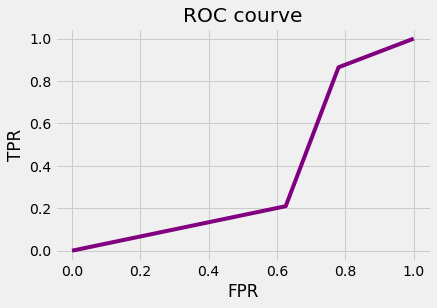

In [230]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()


**PRC Curve**

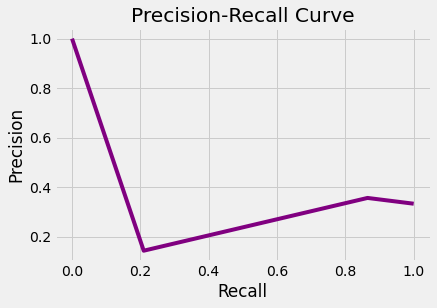

In [231]:

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
plt.show()

**Model-4 : support vector machines**

In [233]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9721904761904762
Validation Accuracy : 0.736
f1 score : 0.736
Precision Score:  0.736
Recall Score:  0.736
[[ 330  201  168]
 [  59  851  215]
 [  25  223 1303]]


In [234]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556, 0.7102222222222222, 0.7102222222222222, 0.736]


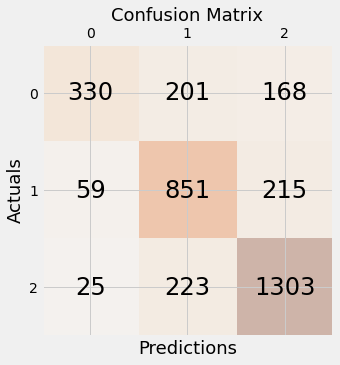

In [235]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()





In [236]:
confusion_M4=pd.crosstab(y_test,y_pred)
confusion_M4



col_0,0,1,2
Label,,,
0,330,201,168
1,59,851,215
2,25,223,1303


**Scores for class 0,1,2 simulaneously**





In [237]:
for i in range(confusion_M4.shape[0]):
    TP=confusion_M4.iloc[i,i].sum()
    FP=confusion_M4.iloc[i,:].sum()-TP
    FN=confusion_M4.iloc[:,i].sum()-TP
    TN=confusion_M4.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M4.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M4.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)




0 0.8657777777777778 0.4721030042918455 0.7971014492753623 0.5929919137466307
1 0.7931851851851852 0.7564444444444445 0.6674509803921569 0.7091666666666667
2 0.813037037037037 0.8401031592520954 0.772835112692764 0.805066419524251


In [239]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2744 WP :  631


In [240]:
SVM_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
SVM_Report.to_excel('TF-IDF_SVM.xlsx')
SVM_Report

,precision,recall,f1-score,support
0,0.797101,0.472103,0.592992,699.000
1,0.667451,0.756444,0.709167,1125.000
2,0.772835,0.840103,0.805066,1551.000
accuracy,0.736000,0.736000,0.736000,0.736
macro avg,0.745796,0.689550,0.702408,3375.000
weighted avg,0.742733,0.736000,0.729177,3375.000



**ROC Curve- Receiver Operating Characteristics Curve**


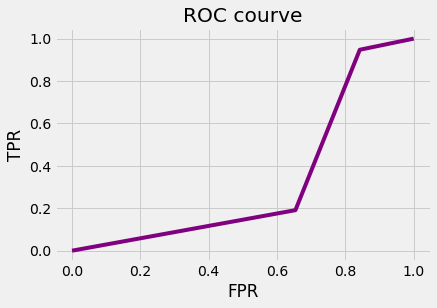

In [241]:

# FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()




**PRC Curve**



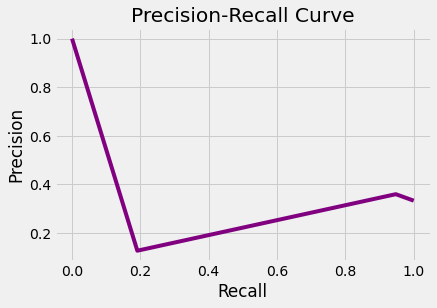

In [242]:

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



# #create precision recall curve
# fig, ax = plt.subplots()
# ax.plot(recall, precision, color='purple')

# #add axis labels to plot
# ax.set_title('Precision-Recall Curve')
# ax.set_ylabel('Precision')
# ax.set_xlabel('Recall')

#display plot
plt.show()

## **Model-5 : XG Boost classifier**

In [243]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.8968888888888888
Validation Accuracy : 0.8142222222222222
f1 score : 0.8142222222222222
Precision Score:  0.8142222222222222
Recall Score:  0.8142222222222222
[[ 461   87  151]
 [  95  823  207]
 [  14   73 1464]]


In [244]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556, 0.7102222222222222, 0.7102222222222222, 0.736, 0.8142222222222222]


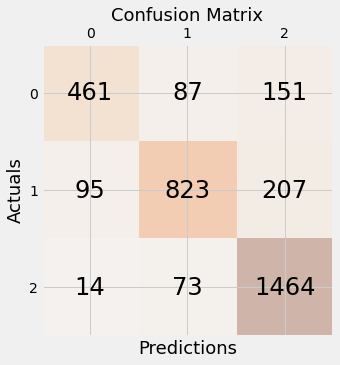

In [245]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()




In [246]:

confusion_M5=pd.crosstab(y_test,y_pred)
confusion_M5


col_0,0,1,2
Label,,,
0,461,87,151
1,95,823,207
2,14,73,1464



**Scores for class 0,1,2 simulaneously**




In [247]:

for i in range(confusion_M5.shape[0]):
    TP=confusion_M5.iloc[i,i].sum()
    FP=confusion_M5.iloc[i,:].sum()-TP
    FN=confusion_M5.iloc[:,i].sum()-TP
    TN=confusion_M5.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M5.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M5.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)



0 0.8971851851851852 0.6595135908440629 0.8087719298245614 0.7265563435776201
1 0.8631111111111112 0.7315555555555555 0.8372329603255341 0.7808349146110056
2 0.8681481481481481 0.9439071566731141 0.8035126234906695 0.8680699673880818


In [248]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2930 WP :  445


In [249]:
XGB_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
XGB_Report.to_excel('TF-IDF_XGB.xlsx')
XGB_Report


,precision,recall,f1-score,support
0,0.808772,0.659514,0.726556,699.000000
1,0.837233,0.731556,0.780835,1125.000000
2,0.803513,0.943907,0.868070,1551.000000
accuracy,0.814222,0.814222,0.814222,0.814222
macro avg,0.816506,0.778325,0.791820,3375.000000
weighted avg,0.815842,0.814222,0.809683,3375.000000



**ROC Curve- Receiver Operating Characteristics Curve**



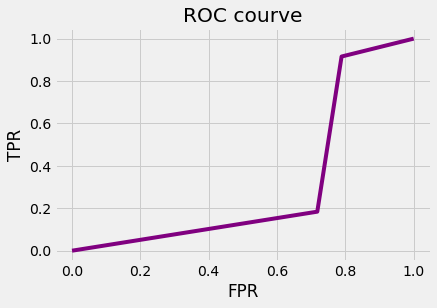

In [250]:
#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()




**PRC Curve**




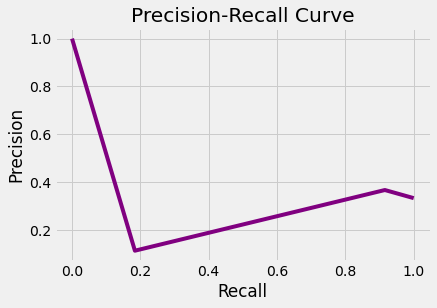

In [251]:

#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

**Model-6 : Gaussian Naive Bayes (GNB)**

In [252]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [253]:
model.fit(x_train.todense(), y_train)

y_pred = model.predict(x_test.todense())

print("Training Accuracy :", model.score(x_train.todense(), y_train))
print("Validation Accuracy :", model.score(x_test.todense(), y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy : 0.7344761904761905


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Validation Accuracy : 0.5982222222222222
f1 score : 0.5982222222222222
Precision Score:  0.5982222222222222
Recall Score:  0.5982222222222222
[[ 511   92   96]
 [ 590  412  123]
 [ 352  103 1096]]


In [254]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556, 0.7102222222222222, 0.7102222222222222, 0.736, 0.8142222222222222, 0.5982222222222222]


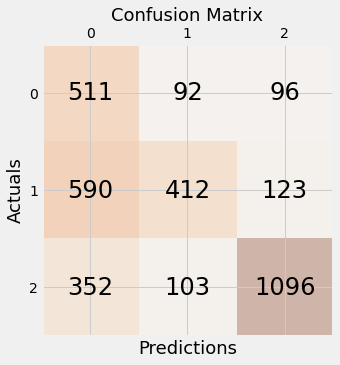

In [255]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [256]:
confusion_M6=pd.crosstab(y_test,y_pred)
confusion_M6


col_0,0,1,2
Label,,,
0,511,92,96
1,590,412,123
2,352,103,1096


In [257]:
for i in range(confusion_M6.shape[0]):
    TP=confusion_M6.iloc[i,i].sum()
    FP=confusion_M6.iloc[i,:].sum()-TP
    FN=confusion_M6.iloc[:,i].sum()-TP
    TN=confusion_M6.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M6.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M6.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)



0 0.6651851851851852 0.7310443490701002 0.35168616655196144 0.47490706319702597
1 0.7309629629629629 0.3662222222222222 0.6787479406919276 0.4757505773672055
2 0.8002962962962963 0.7066408768536429 0.8334600760456273 0.7648290300069783


In [258]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2701 WP :  674


In [259]:
GNB_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
GNB_Report.to_excel('TF-IDF_GNB.xlsx')
GNB_Report


,precision,recall,f1-score,support
0,0.351686,0.731044,0.474907,699.000000
1,0.678748,0.366222,0.475751,1125.000000
2,0.833460,0.706641,0.764829,1551.000000
accuracy,0.598222,0.598222,0.598222,0.598222
macro avg,0.621298,0.601302,0.571829,3375.000000
weighted avg,0.682109,0.598222,0.608423,3375.000000


**ROC Curve- Receiver Operating Characteristics Curve**


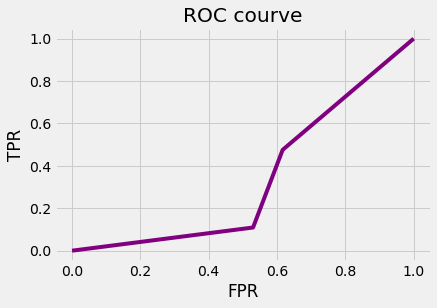

In [260]:




#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()






**PRC Curve**

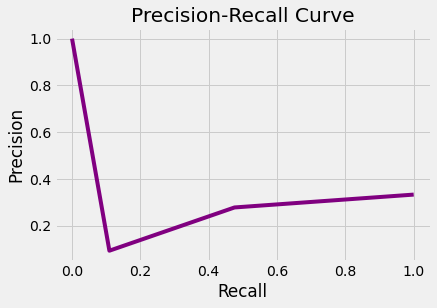

In [261]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

**Model-7 : ADA boost**

In [262]:


from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()

model.fit(x_train.todense(), y_train)

y_pred = model.predict(x_test.todense())

print("Training Accuracy :", model.score(x_train.todense(), y_train))
print("Validation Accuracy :", model.score(x_test.todense(), y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='micro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='micro')
RS=recall_score(y_test, y_pred,average='micro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy : 0.7311746031746031


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Validation Accuracy : 0.7315555555555555
f1 score : 0.7315555555555555
Precision Score:  0.7315555555555555
Recall Score:  0.7315555555555555
[[ 384   52  263]
 [  90  562  473]
 [  16   12 1523]]


In [263]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556, 0.7102222222222222, 0.7102222222222222, 0.736, 0.8142222222222222, 0.5982222222222222, 0.7315555555555555]


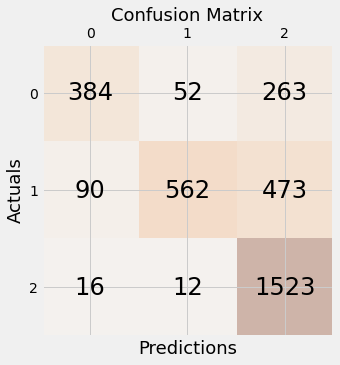

In [264]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [265]:
confusion_M7=pd.crosstab(y_test,y_pred)
confusion_M7




col_0,0,1,2
Label,,,
0,384,52,263
1,90,562,473
2,16,12,1523


In [266]:
for i in range(confusion_M7.shape[0]):
    TP=confusion_M7.iloc[i,i].sum()
    FP=confusion_M7.iloc[i,:].sum()-TP
    FN=confusion_M7.iloc[:,i].sum()-TP
    TN=confusion_M7.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M7.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M7.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)





0 0.8752592592592593 0.5493562231759657 0.7836734693877551 0.6459209419680403
1 0.8142222222222222 0.49955555555555553 0.8977635782747604 0.6419189034837236
2 0.7736296296296297 0.9819471308833011 0.6741921204072598 0.7994750656167979


In [267]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2611 WP :  764


In [268]:
ADA_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
ADA_Report.to_excel('TF-IDF_ADA.xlsx')
ADA_Report



,precision,recall,f1-score,support
0,0.783673,0.549356,0.645921,699.000000
1,0.897764,0.499556,0.641919,1125.000000
2,0.674192,0.981947,0.799475,1551.000000
accuracy,0.731556,0.731556,0.731556,0.731556
macro avg,0.785210,0.676953,0.695772,3375.000000
weighted avg,0.771391,0.731556,0.715154,3375.000000



**ROC Curve- Receiver Operating Characteristics Curve**




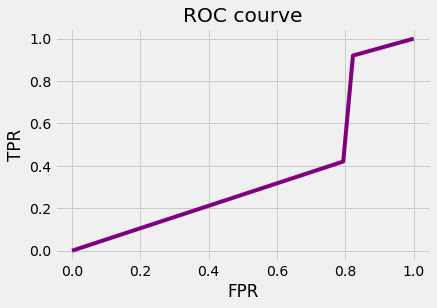

In [269]:




#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()






**PRC Curve**

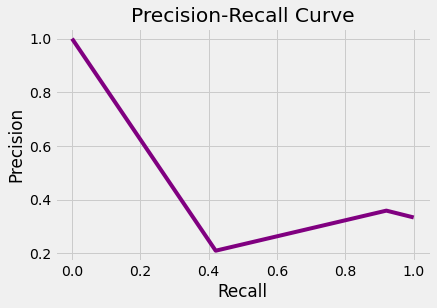

In [270]:




#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



**Model-8 : KNN**

In [271]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test.todense())

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='macro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='macro')
RS=recall_score(y_test, y_pred,average='macro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Training Accuracy : 0.5857777777777777
Validation Accuracy : 0.5137777777777778
f1 score : 0.4021506551847322
Precision Score:  0.5640553488025043
Recall Score:  0.42448375392435295
[[ 136   23  540]
 [  47  199  879]
 [  54   98 1399]]


In [272]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556, 0.7102222222222222, 0.7102222222222222, 0.736, 0.8142222222222222, 0.5982222222222222, 0.7315555555555555, 0.5137777777777778]


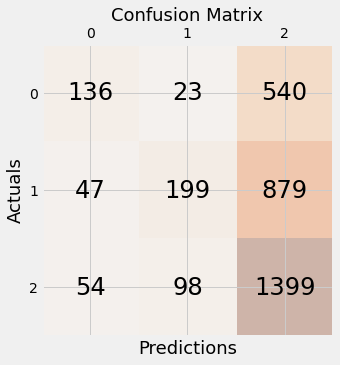

In [273]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [274]:
confusion_M8=pd.crosstab(y_test,y_pred)
confusion_M8



col_0,0,1,2
Label,,,
0,136,23,540
1,47,199,879
2,54,98,1399


In [275]:
for i in range(confusion_M8.shape[0]):
    TP=confusion_M8.iloc[i,i].sum()
    FP=confusion_M8.iloc[i,:].sum()-TP
    FN=confusion_M8.iloc[:,i].sum()-TP
    TN=confusion_M8.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M8.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M8.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)


0 0.8032592592592592 0.19456366237482117 0.5738396624472574 0.2905982905982906
1 0.6897777777777778 0.1768888888888889 0.621875 0.27543252595155715
2 0.5345185185185185 0.9019987105093488 0.4964513839602555 0.6404211490043488


In [276]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  1804 WP :  1571


In [277]:
KNN_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
KNN_Report.to_excel('TF-IDF_KNN.xlsx')
KNN_Report

,precision,recall,f1-score,support
0,0.573840,0.194564,0.290598,699.000000
1,0.621875,0.176889,0.275433,1125.000000
2,0.496451,0.901999,0.640421,1551.000000
accuracy,0.513778,0.513778,0.513778,0.513778
macro avg,0.564055,0.424484,0.402151,3375.000000
weighted avg,0.554287,0.513778,0.446306,3375.000000



**ROC Curve- Receiver Operating Characteristics Curve**








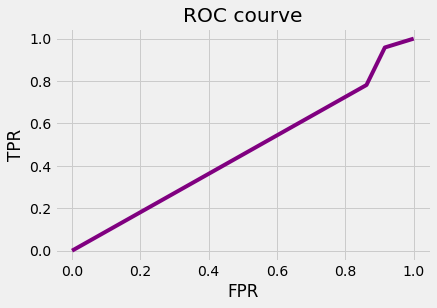

In [278]:


#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()








**PRC Curve**




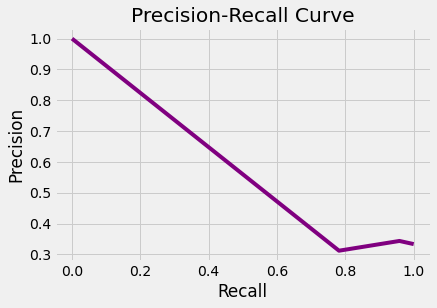

In [279]:



#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



**Model-9 : extra tree classifier (ETC)**

In [280]:
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='macro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='macro')
RS=recall_score(y_test, y_pred,average='macro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9991111111111111
Validation Accuracy : 0.8213333333333334
f1 score : 0.7973802244277074
Precision Score:  0.8182048781310725
Recall Score:  0.7852584149718659
[[ 451  130  118]
 [  84  877  164]
 [  15   92 1444]]


In [281]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556, 0.7102222222222222, 0.7102222222222222, 0.736, 0.8142222222222222, 0.5982222222222222, 0.7315555555555555, 0.5137777777777778, 0.8213333333333334]


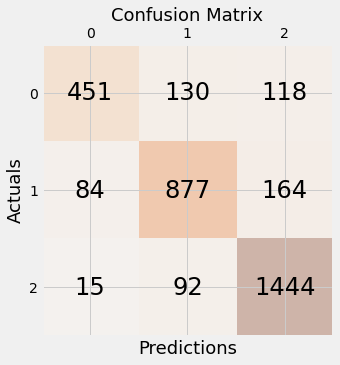

In [282]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()




In [283]:

confusion_M9=pd.crosstab(y_test,y_pred)
confusion_M9





col_0,0,1,2
Label,,,
0,451,130,118
1,84,877,164
2,15,92,1444


In [284]:

for i in range(confusion_M9.shape[0]):
    TP=confusion_M9.iloc[i,i].sum()
    FP=confusion_M9.iloc[i,:].sum()-TP
    FN=confusion_M9.iloc[:,i].sum()-TP
    TN=confusion_M9.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M9.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M9.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)






0 0.8971851851851852 0.6452074391988555 0.82 0.722177742193755
1 0.8607407407407407 0.7795555555555556 0.7979981801637852 0.7886690647482014
2 0.8847407407407407 0.9310122501611864 0.8366164542294322 0.8812938663411658


In [285]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2986 WP :  389


In [286]:

ETC_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
ETC_Report.to_excel('TF-IDF_ETC.xlsx')
ETC_Report




,precision,recall,f1-score,support
0,0.820000,0.645207,0.722178,699.000000
1,0.797998,0.779556,0.788669,1125.000000
2,0.836616,0.931012,0.881294,1551.000000
accuracy,0.821333,0.821333,0.821333,0.821333
macro avg,0.818205,0.785258,0.797380,3375.000000
weighted avg,0.820302,0.821333,0.817464,3375.000000




**ROC Curve- Receiver Operating Characteristics Curve**





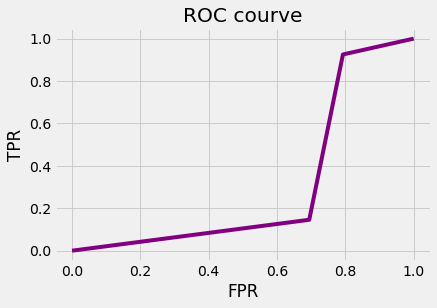

In [287]:





#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()








**PRC Curve**




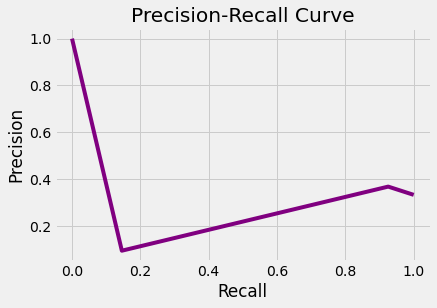

In [288]:



#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()




Model-10 : Stochastic gradient descent (SGD)

In [289]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_test, y_test))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred,average='macro'))

#Calculating Precision and Recall Score
PS=precision_score(y_test, y_pred,average='macro')
RS=recall_score(y_test, y_pred,average='macro')
print("Precision Score: ",PS)
print("Recall Score: ",RS)


# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

Training Accuracy : 0.9864126984126984
Validation Accuracy : 0.7211851851851852
f1 score : 0.7067388902222548
Precision Score:  0.7027268282897712
Recall Score:  0.712846233005488
[[ 473  118  108]
 [ 146  809  170]
 [ 152  247 1152]]


In [290]:
Model_Accuracy.append(accuracy_score(y_test, y_pred))
print(Model_Accuracy)

[0.7733333333333333, 0.7075555555555556, 0.7075555555555556, 0.7102222222222222, 0.7102222222222222, 0.736, 0.8142222222222222, 0.5982222222222222, 0.7315555555555555, 0.5137777777777778, 0.8213333333333334, 0.7211851851851852]


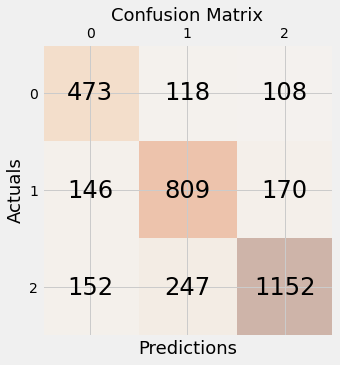

In [291]:
#Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [292]:

confusion_M10=pd.crosstab(y_test,y_pred)
confusion_M10

col_0,0,1,2
Label,,,
0,473,118,108
1,146,809,170
2,152,247,1152


In [293]:
for i in range(confusion_M10.shape[0]):
    TP=confusion_M10.iloc[i,i].sum()
    FP=confusion_M10.iloc[i,:].sum()-TP
    FN=confusion_M10.iloc[:,i].sum()-TP
    TN=confusion_M10.sum().sum()-TP-FP-FN
    Accuracy_class=(TP+TN)/confusion_M10.sum().sum()
    precision_class=TP/(TP+FP)
    Recall_class=TP/(TP+FN)
    F1_Class=(2*precision_class*Recall_class)/(precision_class+Recall_class)
    print(confusion_M10.index[i],Accuracy_class,precision_class,Recall_class,F1_Class)






0 0.8447407407407408 0.6766809728183119 0.6134889753566797 0.6435374149659865
1 0.7982222222222223 0.7191111111111111 0.6890971039182283 0.7037842540234885
2 0.7994074074074075 0.7427466150870407 0.8055944055944056 0.7728950016772895


In [294]:
CP=TP+TN
WP=FP+FN
print(" CP : ",CP,"WP : ",WP)

 CP :  2698 WP :  677


In [295]:

SGD_Report=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
SGD_Report.to_excel('TF-IDF_SGD.xlsx')
SGD_Report


,precision,recall,f1-score,support
0,0.613489,0.676681,0.643537,699.000000
1,0.689097,0.719111,0.703784,1125.000000
2,0.805594,0.742747,0.772895,1551.000000
accuracy,0.721185,0.721185,0.721185,0.721185
macro avg,0.702727,0.712846,0.706739,3375.000000
weighted avg,0.726975,0.721185,0.723067,3375.000000




**ROC Curve- Receiver Operating Characteristics Curve**






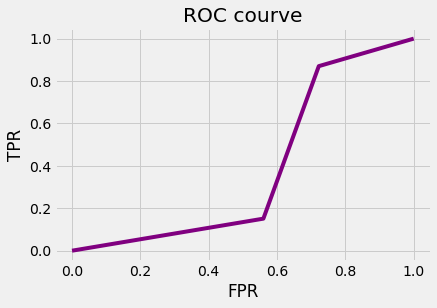

In [296]:






#FPR (x-axis) TPR (y-axis)

fpr, tpr, thresholds = roc_curve(y_test, y_pred,pos_label=1)
plt.plot(fpr,tpr,color='purple')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC courve")
plt.show()










**PRC Curve**





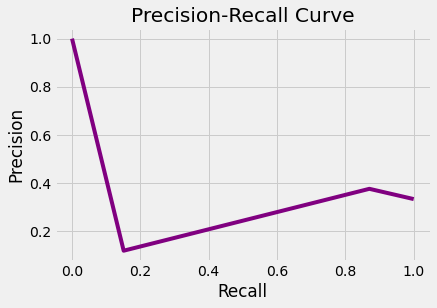

In [297]:




#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_pred,pos_label=1)

plt.plot(recall, precision, color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()



# Data Visualisation

**WordCloud**

In [126]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
all_words = ' '
stopwords=set(stopwords.words('english'))

for val in dataset.Tweet:

  # typecaste each val to string
  val = str(val)
 
  # split the value
  tokens = val.split()
     
  # Converts each token into lowercase
  for i in range(len(tokens)):
    tokens[i] = tokens[i].lower()

  allwords =all_words + " ".join(tokens)+" "

    

In [127]:
wordcloud = WordCloud(width = 800,
                      height = 800,
                      background_color ='white',
                      stopwords = stopwords, 
                      min_font_size = 10).generate(allwords)


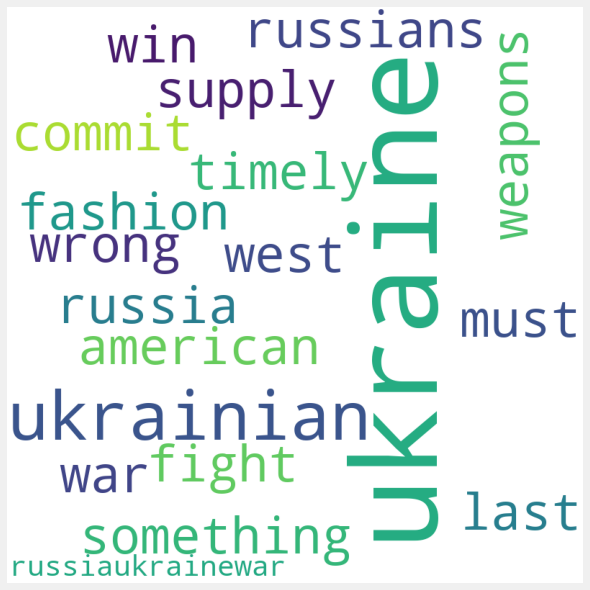

In [128]:
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**Box Plot** - Statistical details of training and testing Dataset

In [129]:
dataset

,Tweet_num,Date,User,Tweet,Subjectivity,Polarity,Analysis,Label
0,0,2022-06-19 14:39:17+00:00,SuganthanRamak1,for gods sake its their choice putin on ukrain...,0.000000,0.000000,Neutral,2
1,1,2022-06-19 14:38:45+00:00,WilsonShilo,the eu warn that russian action in russiaukrai...,0.050000,0.050000,Positive,1
2,3,2022-06-19 14:37:19+00:00,NasticInc,a russian plane crash near chernihiv ukraine r...,0.133333,0.033333,Positive,1
3,6,2022-06-19 14:35:51+00:00,NasticInc,terror attack catch on cctv footage standwithu...,0.000000,0.000000,Neutral,2
4,7,2022-06-19 14:35:23+00:00,NasticInc,a russian ship burn at port of berdyansk ukrai...,0.000000,0.000000,Neutral,2
...,...,...,...,...,...,...,...,...
11245,24994,2022-05-27 00:11:50+00:00,ichbin_ironhill,russia doesnt kill the 5000 ukrainian pows ukr...,0.333333,0.200000,Positive,1
11246,24995,2022-05-27 00:04:53+00:00,RusskieUkraine,insane footage from ukraine us and uk foreign ...,0.545000,-0.265000,Negative,0
11247,24996,2022-05-27 00:03:51+00:00,Globallpolitics,obesity be the second lead cause of death in t...,0.000000,0.000000,Neutral,2
11248,24997,2022-05-27 00:01:02+00:00,Globallpolitics,list of 6 anti agingfood usa china food antiag...,0.000000,0.000000,Neutral,2


In [ ]:
#confusion matrix of table


In [130]:
training_data=x_train
testing_data=x_test

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

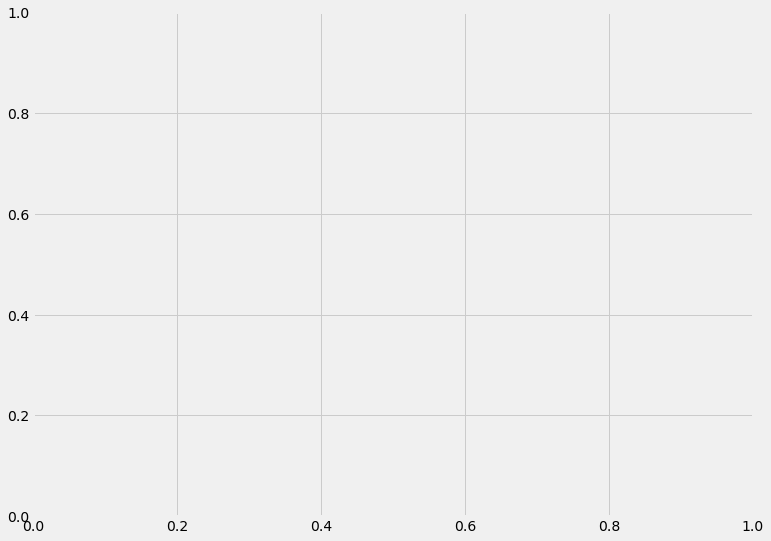

In [131]:
fig=plt.figure(figsize=(10,7))
#creating axes instances
ax=fig.add_axes([0,0,1,1])
#creating Plot
bp=ax.boxplot(training_data)
#show plot
plt.show()

In [ ]:
sn.set_theme(style="whitegrid")
#tips=sn.load_dataset("dataset")
ax=sn.boxplot(x="dataset",y='tip',data=dataset)

**Model Comparison using multiple bar chart**

In [ ]:
Bow_Model_accuracy=Model_Accuracy
Bow_Model_accuracy

In [ ]:
TF_IDF_Model_accuracy=Model_Accuracy
TF_IDF_Model_accuracy

In [ ]:
N_gram_Model_accuracy=Model_Accuracy
N_gram_Model_accuracy

In [ ]:
print("BOW Model Accuracy of 10 model \n",Bow_Model_accuracy)

In [ ]:
models=["RF","LR","DT","SVM","XGB","GNB","ADA","KNN","ETC","SGD"]
BOW= Bow_Model_accuracy
TF_IDF=TF_IDF_Model_accuracy
N_gram=N_gram_Model_accuracy

In [ ]:
w=0.2
fig1=plt.figure(figsize=(10,7))
bow_bar=np.arange(len(models))
tf_idf_bar=[i+w for  i in bow_bar]
n_gram_bar=[i+w for i in tf_idf_bar]

print(bow_bar)
plt.bar(bow_bar,BOW,width=w,label="BOW")
print(tf_idf_bar)
plt.bar(tf_idf_bar,TF_IDF,width=w,label="TF-IDF")
print(n_gram_bar)
plt.bar(n_gram_bar,TF_IDF,width=w,label="N-Gram")

plt.xticks(tf_idf_bar,models)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models Comparison")
plt.legend()
plt.show()

fig1.savefig('Model Comparison.jpg')

In [ ]:
#show the value counts
print(dataset['Analysis'].value_counts())

#Plot and Visualize the counts
fig2=plt.figure(figsize=(10,5))
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
dataset['Analysis'].value_counts().plot(kind='bar',width=0.5)
plt.show()

plt.show()
fig2.savefig('Sentiment Analysis.jpg')